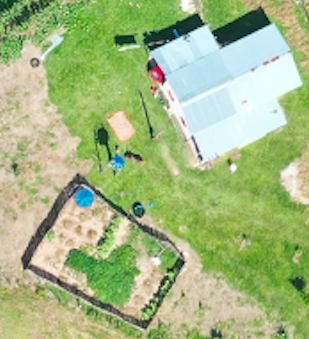

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Imagem = Image.open('img/surface.png')

# QUESTÃO I - PPM P3 output

# Apply filter on image with RGB layout PPM P3 (text)
if Imagem.mode != "RGB":
    Imagem = Imagem.convert("RGB")

image_array = np.array(Imagem)
altura, largura, canais = image_array.shape

with open("output.ppm", "w") as f:
    f.write("P3\n")
    f.write(f"{largura} {altura}\n")
    f.write("255\n")

    for linha in image_array:
        text = " ".join(f"{r} {g} {b}" for r, g, b in linha)
        f.write(text + "\n")

Imagem

### SOBRE A QUESTÃO 2:
#### O que acontece quando n cresce?
- A "janela" de pixels que ele captura ao redor do pixel central aumenta, ele considera um "contexto" maior no calculo da variação da intensidade;
- Maior alcance espacial, levando em consideração mais pixels ao redor, pode capturar gradientes X e Y mais suaves;
- Como capturam em uma escala maior, são menos sensíveis a detalhes pequenos, como texturas ou bordas mais finas;
- Menor interferências de ruídos pequenos ou variações abruptas na intensidade do pixel, porque a janela considera um número maior de pixels;

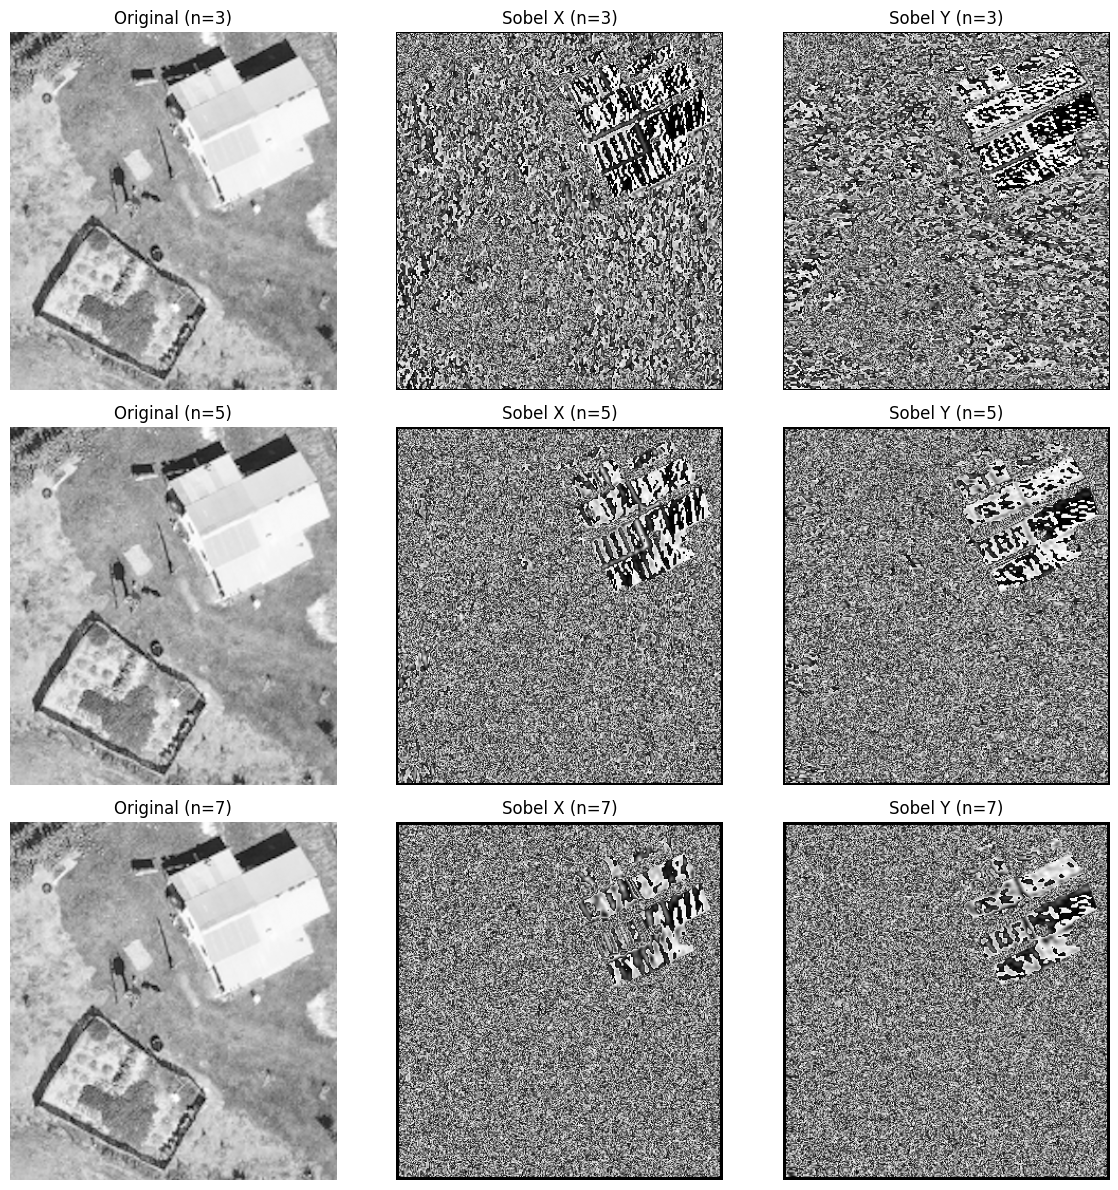

In [5]:
# QUESTÃO II - Sobel Filter

# gray scale transform
Imagem = Imagem.convert("L")
image_array = np.array(Imagem)

# Run and apply Sobel Filter
def aplicar_sobel(image_array, kernel):
    altura, largura = image_array.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2

    output = np.zeros_like(image_array)

    # running pixels image, work on border
    for i in range(offset, altura - offset):
        for j in range(offset, largura - offset):
            region = image_array[i - offset:i + offset + 1, j - offset:j + offset + 1]
            output[i, j] = np.sum(region * kernel)
    return output

# 3 different weight and size kernels
sobel_kernels = {
    3: (np.array([[-2, 0, 2], 
                  [-4, 0, 4], 
                  [-2, 0, 2]]), 
        np.array([[-2, -4, -2], 
                  [0, 0, 0], 
                  [2, 4, 2]])),

    5: (np.array([[-1, -1, 0, 1, 1], 
                  [-2, -2, 0, 2, 2], 
                  [-4, -4, 0, 4, 4], 
                  [-2, -2, 0, 2, 2], 
                  [-1, -1, 0, 1, 1]]),
        np.array([[-1, -2, -4, -2, -1], 
                  [-1, -2, -4, -2, -1], 
                  [ 0,  0,  0,  0,  0], 
                  [ 1,  2,  4,  2,  1], 
                  [ 1,  2,  4,  2,  1]])),

    7: (np.array([[-1, -1, -1, 0, 1, 1, 1], 
                  [-2, -2, -2, 0, 2, 2, 2], 
                  [-3, -3, -3, 0, 3, 3, 3], 
                  [-4, -4, -4, 0, 4, 4, 4], 
                  [-3, -3, -3, 0, 3, 3, 3], 
                  [-2, -2, -2, 0, 2, 2, 2], 
                  [-1, -1, -1, 0, 1, 1, 1]]),
        np.array([[-1, -2, -3, -4, -3, -2, -1], 
                  [-1, -2, -3, -4, -3, -2, -1], 
                  [-1, -2, -3, -4, -3, -2, -1], 
                  [ 0,  0,  0,  0,  0,  0,  0], 
                  [ 1,  2,  3,  4,  3,  2,  1], 
                  [ 1,  2,  3,  4,  3,  2,  1], 
                  [ 1,  2,  3,  4,  3,  2,  1]]))
}

# plots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for idx, (n, (sobel_x, sobel_y)) in enumerate(sobel_kernels.items()):
    grad_x = aplicar_sobel(image_array, sobel_x)
    grad_y = aplicar_sobel(image_array, sobel_y)
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    imagens = [image_array, grad_x, grad_y, grad_magnitude]
    titles = [f"Original (n={n})", f"Sobel X (n={n})", f"Sobel Y (n={n})"]
    
    for ax, img, title in zip(axes[idx], imagens, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        
        ax.axis('off')

plt.tight_layout()
plt.show()

### QUESTÃO 3:
#### Pesquise e implemente um filtro para remoção de ruídos que não possa ser representado com convoluções
Escolhi o filtro de mediana, ele é um filtro não Linear, pois não temos médias ponderadas onde mais pesos influênciam no resultado, aqui calculamos estatísticas obtidas entre média total dos vizinhos e aplicamos ao pixel de interesse e é eficaz na remoção de pequenos ruídos.

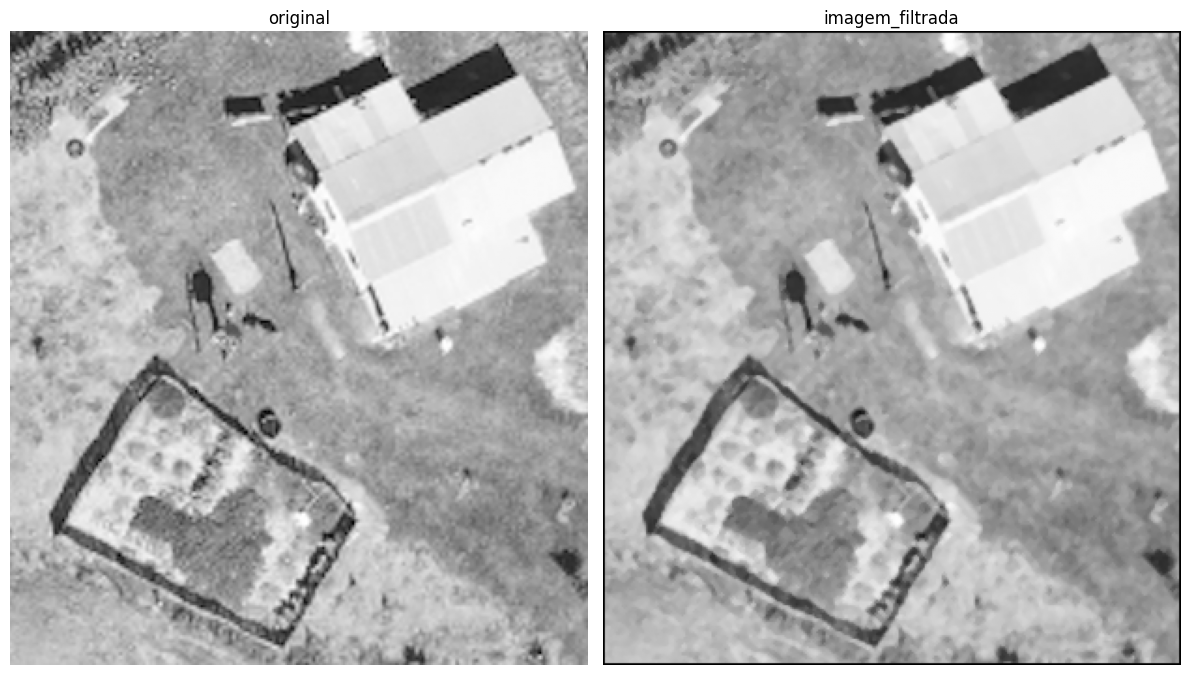

In [6]:
# QUESTÃO III:
# Apply median filter
n = 3
offset = n // 2

imagem_filtrada = np.zeros_like(image_array)

for i in range(offset, image_array.shape[0] - offset):
    for j in range(offset, image_array.shape[1] - offset):
        neighbor = image_array[i - offset:i + offset + 1, j - offset:j + offset + 1]
        imagem_filtrada[i, j] = np.median(neighbor)

imagens = [image_array, imagem_filtrada]
titles = ["original", "imagem_filtrada"]

fig, axes = plt.subplots(1, 2, figsize=(12, 12))

for ax, img, title in zip(axes, imagens, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

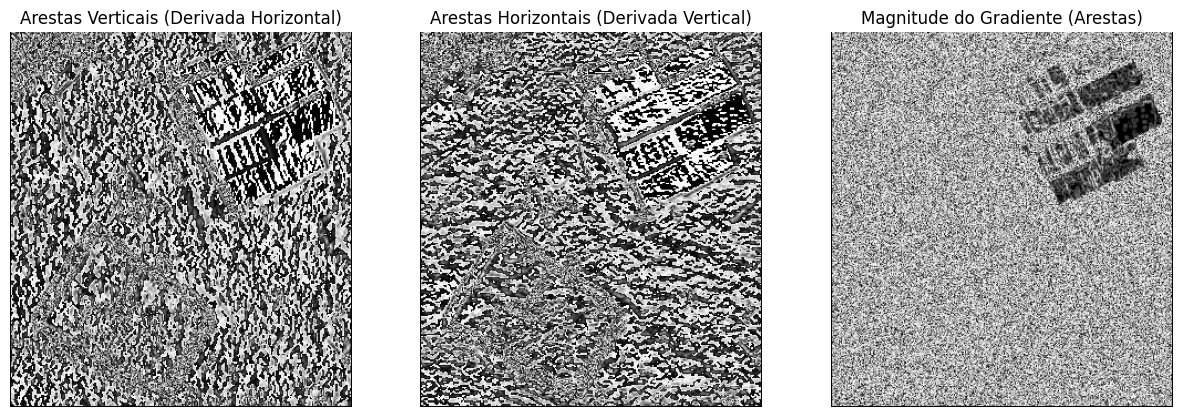

In [7]:
#QUESTAO IV - Gradient

# Kernel Sobel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Calcula os gradientes
grad_x = aplicar_sobel(image_array, sobel_x)
grad_y = aplicar_sobel(image_array, sobel_y)

# Magnitude do gradiente
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normaliza as imagens
grad_x = (grad_x / grad_x.max()) * 255
grad_y = (grad_y / grad_y.max()) * 255
grad_magnitude = (grad_magnitude / grad_magnitude.max()) * 255


# plots
imagens = [grad_x, grad_y, grad_magnitude]
titles = ["Arestas Verticais (Derivada Horizontal)", "Arestas Horizontais (Derivada Vertical)", "Magnitude do Gradiente (Arestas)"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img, title in zip(axes, imagens, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


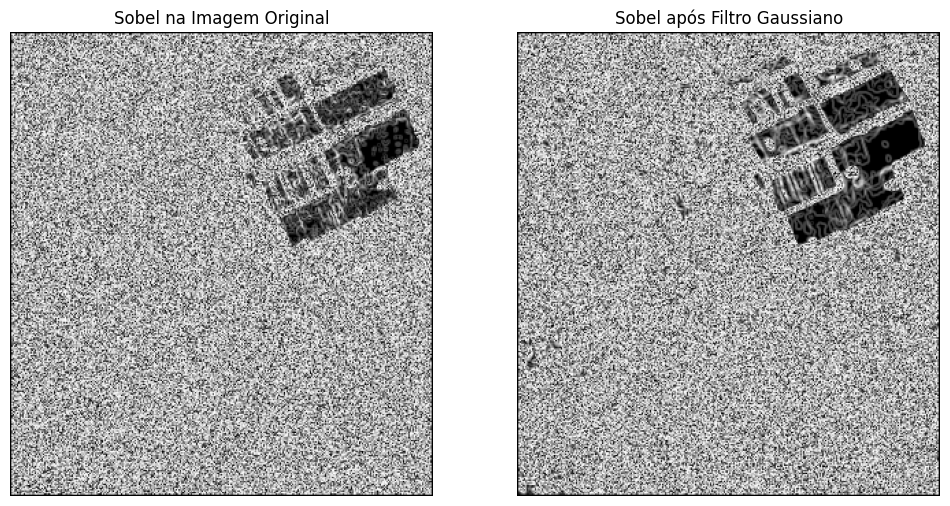

In [8]:
# QUESTÃO V - Gaussian Filter 1/273

# Desvio padrão indicado na questão
gaussian_filter = np.array([
    [1/273, 4/273, 7/273, 4/273, 1/273],
    [4/273, 16/273, 26/273, 16/273, 4/273],
    [7/273, 26/273, 41/273, 26/273, 7/273],
    [4/273, 16/273, 26/273, 16/273, 4/273],
    [1/273, 4/273, 7/273, 4/273, 1/273]
])

# Apply Gaussian
def aplicar_filtro_gaussiano(image_array, kernel):
    altura, largura = image_array.shape
    kernel_size = kernel.shape[0]
    offset = kernel_size // 2

    output = np.zeros_like(image_array)

    for i in range(offset, altura - offset):
        for j in range(offset, largura - offset):
            region = image_array[i - offset:i + offset + 1, j - offset:j + offset + 1]
            output[i, j] = np.sum(region * kernel)
    return output

imagem_suavizada = aplicar_filtro_gaussiano(image_array, gaussian_filter)

# Apply sobel filter on smoothed (gaussian fitler) image
grad_x_original = aplicar_sobel(image_array, sobel_x)
grad_y_original = aplicar_sobel(image_array, sobel_y)
grad_magnitude_original = np.sqrt(grad_x_original**2 + grad_y_original**2)

grad_x_suavizada = aplicar_sobel(imagem_suavizada, sobel_x)
grad_y_suavizada = aplicar_sobel(imagem_suavizada, sobel_y)
grad_magnitude_suavized = np.sqrt(grad_x_suavizada**2 + grad_y_suavizada**2)

# plots
imagens = [grad_magnitude_original, grad_magnitude_suavized]
titles = ["Sobel na Imagem Original", "Sobel após Filtro Gaussiano"]

fig, axes = plt.subplots(1, 2, figsize=(12, 12))

for ax, img, title in zip(axes, imagens, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

### SOBRE A QUESTÃO 6: Influência dos parâmetros no Canny
#### Experimente variar cada um dos parâmetros threshold1, threshold2 e apertureSize. Explique com suas palavras a influência de cada parâmetro no resultado?
O algoritmo Canny é usado para extrair as bordas, obter a mask da imagem binária, ele pede 2 paramêtros de input, threshold1 e threhold2, são dois limiares e o algoritmo trabalhará com estes, para obter mudanças bruscas na intensidade dos pixels da imagem. O parameter aperture_size controla o tamanho da janela usada para calcular o gradiente.
    - Filter
    - Gradient
    - Sup. Non Max
- Threshold1 (limiar inferior): Define o valor mínimo para o gradiente ser considerado borda fraca. Valores baixos detectam mais bordas, enquanto valores mais altos detectam menos bordas na imagem.
- Threshold2 (limiar superior): Define o valor mínimo para bordas fortes. Valores baixos detectam mais bordas, e valores altos detectam menos bordas.
- ApertureSize (tamanho da máscara): Controla o tamanho do kernel para calcular o gradiente. Valores pequenos preservam detalhes finos, mas são sensíveis a ruídos e valores grandes reduzem ruídos, mas podem perder detalhes.

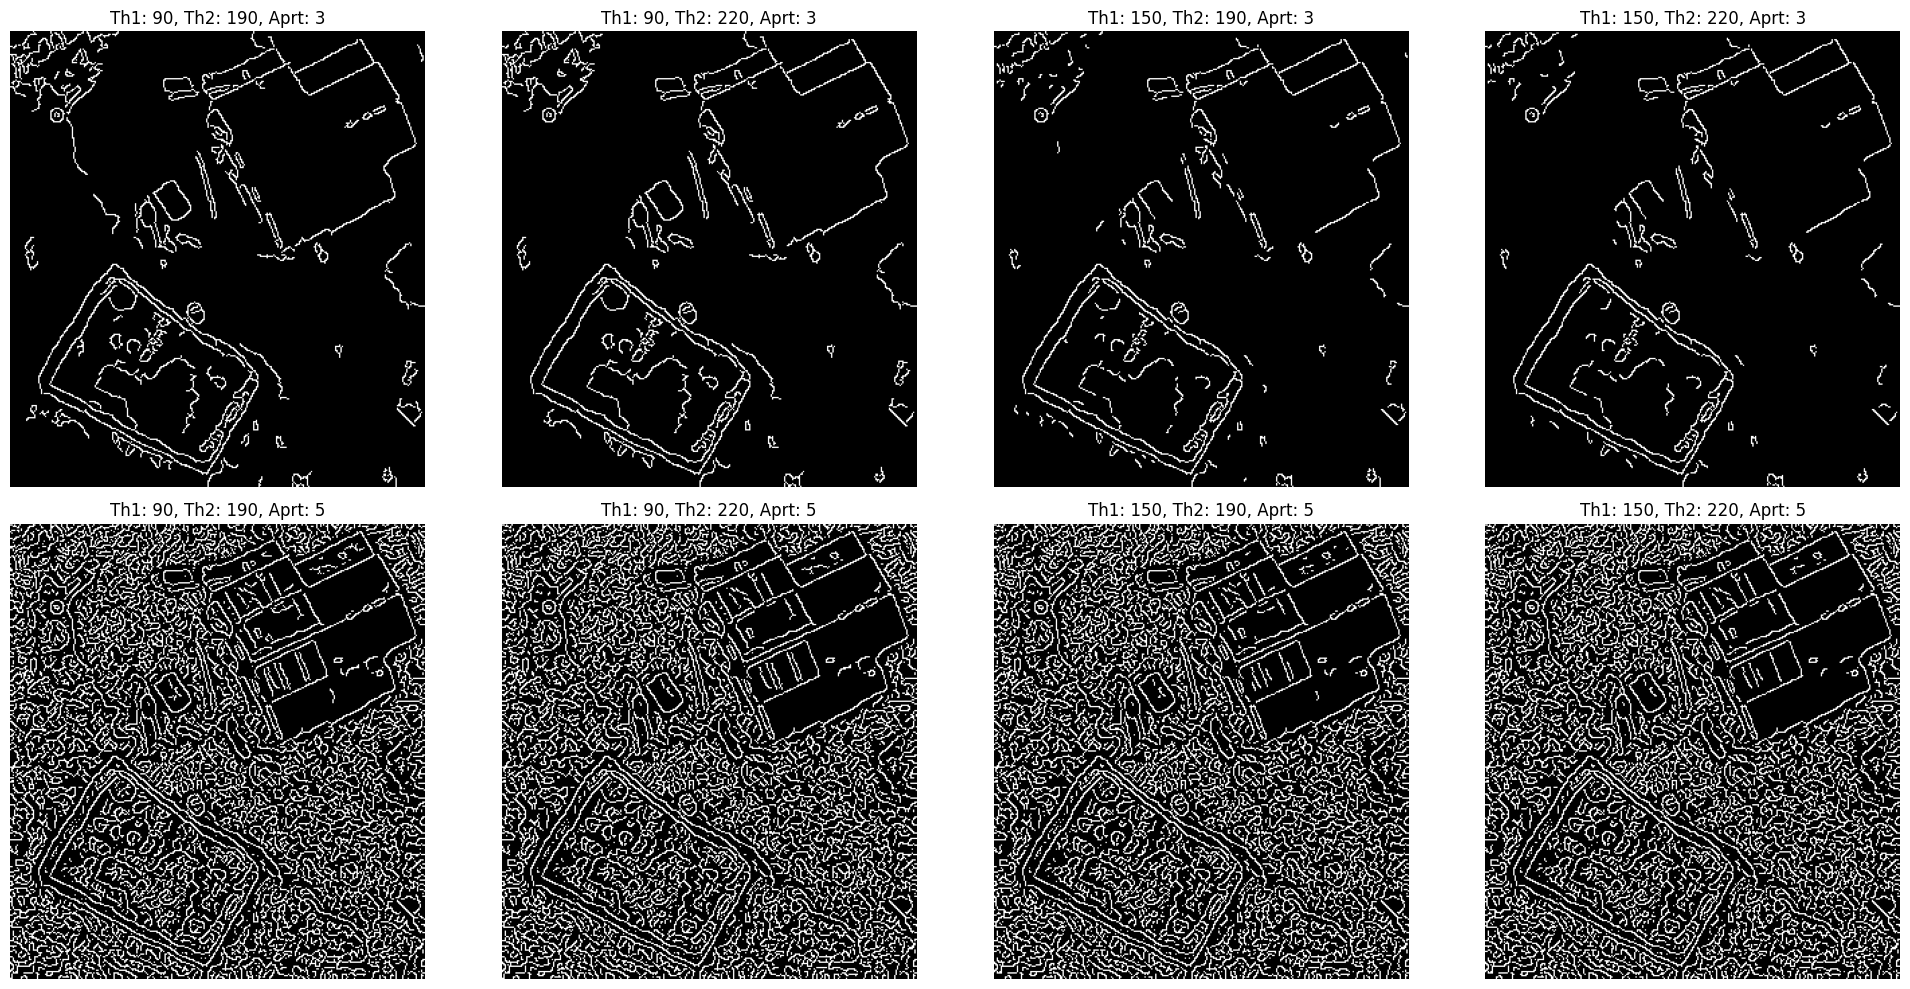

In [9]:
# QUESTÃO VI - Canny Filter

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('img/surface.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny
def aplicar_canny(image, threshold1, threshold2, apertureSize):
    return cv2.Canny(image, threshold1, threshold2, apertureSize=apertureSize)

# Thresholds
threshold1_values = [90, 150]
threshold2_values = [190, 220]
aperture_sizes = [3, 5]

# plots
fig, axes = plt.subplots(len(aperture_sizes), len(threshold1_values) * len(threshold2_values), figsize=(20, 10))

for k, aperture in enumerate(aperture_sizes):
    for i, threshold1 in enumerate(threshold1_values):
        for j, threshold2 in enumerate(threshold2_values):
            edges = aplicar_canny(blurred_image, threshold1, threshold2, apertureSize=aperture)
            ax = axes[k, i * len(threshold2_values) + j]
            ax.imshow(edges, cmap='gray')
            ax.set_title(f'Th1: {threshold1}, Th2: {threshold2}, Aprt: {aperture}')
            ax.axis('off')

plt.tight_layout()
plt.show()

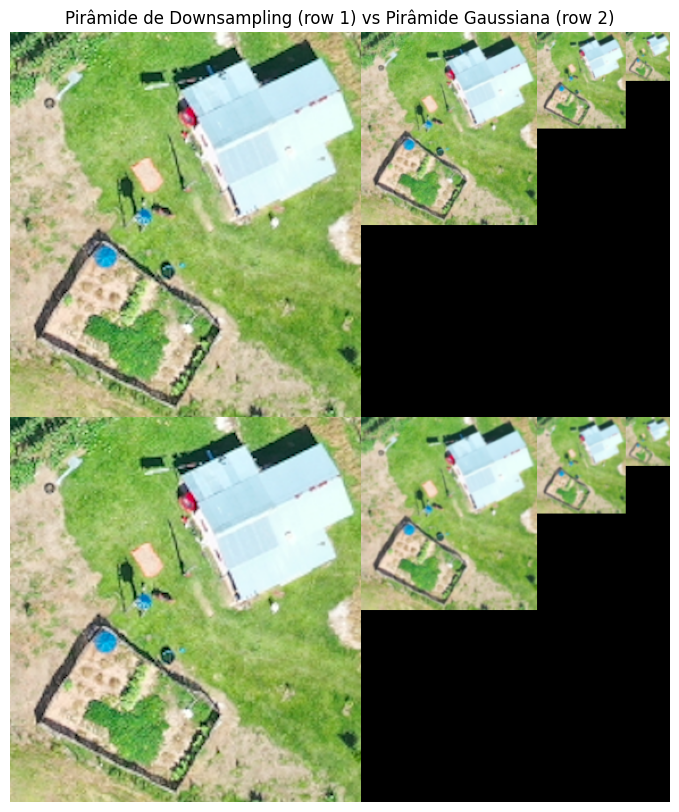

In [10]:
# QUESTÃO VII - Pyramid

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/surface.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Downsample pyr
def create_downsampling_pyramid(image, levels):
    pyramid = [image]
    for _ in range(levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# Gaussian blur + down pyr
def create_gaussian_pyramid(image, levels):
    pyramid = [image]
    for _ in range(levels):
        image = cv2.GaussianBlur(image, (5, 5), 0)
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# level 0 are original image, lv. 1, 2, 3 are downsampling applied.
levels = 3
downsampling_pyramid = create_downsampling_pyramid(image, levels)
gaussian_pyramid = create_gaussian_pyramid(image, levels)

# canvas width
canvas_width_downsampling = sum(img.shape[1] for img in downsampling_pyramid)
canvas_width_gaussian = sum(img.shape[1] for img in gaussian_pyramid)
canvas_width = max(canvas_width_downsampling, canvas_width_gaussian)

canvas_height = downsampling_pyramid[0].shape[0] + gaussian_pyramid[0].shape[0]
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# position images on canvas
x_offset = 0
for img in downsampling_pyramid:
    canvas[0:img.shape[0], x_offset:x_offset+img.shape[1]] = img
    x_offset += img.shape[1]

x_offset = 0
for img in gaussian_pyramid:
    canvas[downsampling_pyramid[0].shape[0]:downsampling_pyramid[0].shape[0]+img.shape[0], x_offset:x_offset+img.shape[1]] = img
    x_offset += img.shape[1]

# plots
plt.figure(figsize=(15, 10))
plt.imshow(canvas)
plt.axis('off')
plt.title("Pirâmide de Downsampling (row 1) vs Pirâmide Gaussiana (row 2)")
plt.show()

### SOBRE A QUESTÃO 8:
#### Dobre as dimensões de sua imagem aplicando interpolaçao linear e bicúbica. Exiba os resultados e explique, em suas palavras, qual a diferença das imagens resultantes.
- A **interpolação Linear** calcula o valor do pixel na imagem que foi redimensionada, tendo base a média ponderada de 4 pixels mais próximo, na imagem original.
- Posterior, a **interpolação Bicúbica** calcula o valor de uma janela maior que a interpolação Linear ao redor do pixel de interesse da imagem original, utiliza um polinômio cúbico para estimar os valores dos pixels originais na imagem redimensionada. Esse polinômio leva em consideração não apenas os valores dos pixels vizinhos, mas também em como esses valores podem variar, seus pesos.
No teste abaixo foi notado uma melhor qualidade na intensidade das cores dos pixels na Interpolação Bicúbica, garantindo que possa ser dito que, a interpolação bicúbica consegue gerar pixels de maior qualidade em relação aos gerados pela média ponderada da Interpolação Linear. 


verify Linear and Bicubic pixels comparison on: img/verify-resized-pixels.png


Dimensão Original: (339, 309, 3)
Dimensão Linear: (678, 618, 3)
Dimensão Bicúbica: (678, 618, 3)


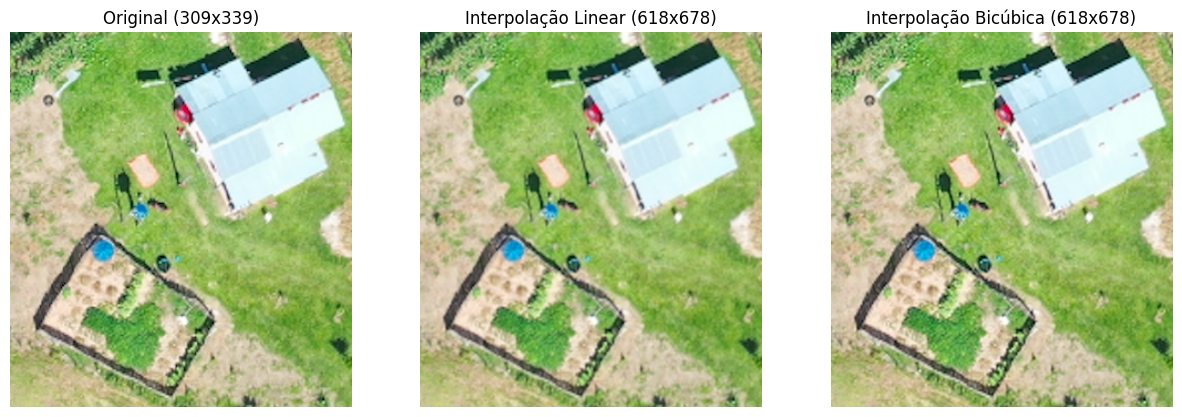

In [11]:
# QUESTÃO VIII - Resize

import cv2
import os
import matplotlib.pyplot as plt

imagem = cv2.imread("output.ppm")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

output_dir = "output"

resized = (imagem.shape[1] * 2, imagem.shape[0] * 2)

# Resize Linear
img_linear = cv2.resize(imagem, resized, interpolation=cv2.INTER_LINEAR)

# Resize bicubic
img_bicubic = cv2.resize(imagem, resized, interpolation=cv2.INTER_CUBIC)

cv2.imwrite(os.path.join(output_dir, "linear_resized.jpg"), cv2.cvtColor(img_linear, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(output_dir, "bicubic_resized.jpg"), cv2.cvtColor(img_bicubic, cv2.COLOR_RGB2BGR))

# plots
imagens = [imagem, img_linear, img_bicubic]
titles = [
    f"Original ({imagem.shape[1]}x{imagem.shape[0]})",
    f"Interpolação Linear ({img_linear.shape[1]}x{img_linear.shape[0]})",
    f"Interpolação Bicúbica ({img_bicubic.shape[1]}x{img_bicubic.shape[0]})"
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img, title in zip(axes, imagens, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# print with canal shape
print("Dimensão Original:", imagem.shape[:3])
print("Dimensão Linear:", img_linear.shape[:3])
print("Dimensão Bicúbica:", img_bicubic.shape[:3])

plt.show()